In [319]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3 #has to be installed via pip (pip install mpld3)

mpld3.enable_notebook() #enables zooming in figures?

In [3]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train.csv")
train = train.drop(["nonclk"],axis=1)

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [6]:
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test.csv")

In [93]:
#train = pd.read_csv("C:\\Users\\Leo\\TaxiData\\train.csv")
ad_feature = pd.read_csv("C:\\Users\\Leo\\AdData\\ad_feature.csv")
train = pd.read_csv("C:\\Users\\Leo\\AdData\\train_extended.csv")
test = pd.read_csv("C:\\Users\\Leo\\AdData\\test_extended.csv")

user_profile = pd.read_csv("C:\\Users\\Leo\\AdData\\user_profile.csv")
behavior_log = pd.read_csv("C:\\Users\\Leo\\AdData\\behavior_log.csv")

In [4]:
train.head()

,user,time_stamp,adgroup_id,pid,clk
0,286630,1494218579,13,430539_1007,0
1,286630,1494289247,13,430539_1007,0
2,26279,1494478631,38,430539_1007,0
3,683451,1494229042,85,430539_1007,0
4,738208,1494198871,102,430548_1007,0


In [5]:
ad_feature.describe()

,adgroup_id,cate_id,campaign_id,customer,brand,price
count,846811.000000,846811.000000,846811.000000,846811.000000,600481.000000,8.468110e+05
mean,423406.000000,5868.593464,206552.604280,113180.406006,229254.422596,1.838867e+03
std,244453.423738,2705.171203,125192.340908,73435.834950,132288.849633,3.108877e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000e-02
25%,211703.500000,4383.000000,97583.000000,47960.000000,110616.000000,4.900000e+01
50%,423406.000000,6183.000000,200780.000000,107278.000000,234423.000000,1.390000e+02
75%,635108.500000,7047.000000,314565.500000,172013.500000,344818.000000,3.520000e+02
max,846811.000000,12960.000000,423436.000000,255875.000000,461497.000000,1.000000e+08


### Merge all information into train set

In [7]:
train = train.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")

In [8]:
train = train.join(user_profile.set_index("userid"),on="user")

In [9]:
train.head()

,user,time_stamp,adgroup_id,pid,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,286630,1494218579,13,430539_1007,0,7211,130458,6395,112840.0,289.0,17,3,2,3,1.0,3,0,4.0
1,286630,1494289247,13,430539_1007,0,7211,130458,6395,112840.0,289.0,17,3,2,3,1.0,3,0,4.0
2,26279,1494478631,38,430539_1007,0,4535,394495,5122,387739.0,1800.0,0,9,1,3,NaN,3,0,2.0
3,683451,1494229042,85,430539_1007,0,6873,398858,53487,443907.0,720.0,0,11,1,5,NaN,3,0,4.0
4,738208,1494198871,102,430548_1007,0,126,138148,20107,102457.0,98.0,34,4,2,4,2.0,3,0,4.0


### Add weekday, hour and weekend fields

In [10]:
train["unix"]=pd.to_datetime(train.time_stamp,unit="s")
train["weekday"]=train.unix.dt.weekday
train["hour"]=train.unix.dt.hour
train["weekend"] = train.weekday >= 5

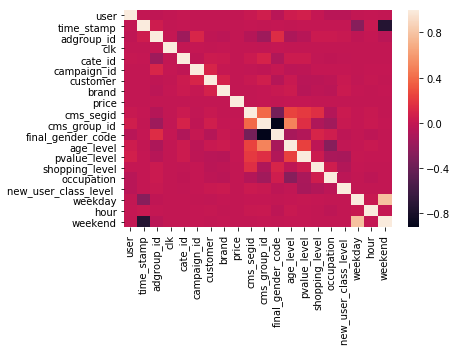

In [11]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Analysis Behavior Log

In [12]:
behavior_log.head()

,user,time_stamp,btag,cate,brand
0,308688,1493820198,pv,6408,258638
1,591909,1493814087,pv,5744,321326
2,876901,1493797178,pv,7621,104107
3,876901,1493797679,pv,7621,104107
4,57178,1493744427,pv,7205,167727


In [13]:
s = behavior_log.sample(n=1)
s

,user,time_stamp,btag,cate,brand
36595288,619902,1493896608,pv,6427,15419


In [14]:
pd.to_datetime(s.time_stamp, unit="s").dt.hour

36595288    11
Name: time_stamp, dtype: int64

In [15]:
behavior_log["unix"]=pd.to_datetime(behavior_log.time_stamp,unit="s")
behavior_log["weekday"]=behavior_log.unix.dt.weekday
behavior_log["hour"]=behavior_log.unix.dt.hour
behavior_log["weekend"] = behavior_log.weekday >= 5

In [16]:
behavior_log.describe()

,user,time_stamp,cate,brand,weekday,hour
count,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07,6.479509e+07
mean,5.768753e+05,1.493774e+09,5.704339e+03,2.125735e+05,3.060469e+00,9.484853e+00
std,3.278639e+05,6.313171e+06,2.522228e+03,1.330231e+05,2.007559e+00,5.706902e+00
min,1.000000e+01,-2.101140e+09,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.923620e+05,1.493303e+09,4.314000e+03,9.401200e+04,1.000000e+00,5.000000e+00
50%,5.795260e+05,1.493816e+09,6.183000e+03,2.046970e+05,3.000000e+00,9.000000e+00
75%,8.566440e+05,1.494256e+09,6.508000e+03,3.262820e+05,5.000000e+00,1.400000e+01
max,1.141723e+06,1.727021e+09,1.297600e+04,4.615270e+05,6.000000e+00,2.300000e+01


In [17]:
behavior_log.shape

(64795089, 9)

In [18]:
behavior_log.head()

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False


In [164]:
behavior_groups = behavior_log.groupby(["user"]).size()

In [165]:
behavior_log

,user,time_stamp,btag,cate,brand,unix,weekday,hour,weekend
0,308688,1493820198,pv,6408,258638,2017-05-03 14:03:18,2,14,False
1,591909,1493814087,pv,5744,321326,2017-05-03 12:21:27,2,12,False
2,876901,1493797178,pv,7621,104107,2017-05-03 07:39:38,2,7,False
3,876901,1493797679,pv,7621,104107,2017-05-03 07:47:59,2,7,False
4,57178,1493744427,pv,7205,167727,2017-05-02 17:00:27,1,17,False
5,738740,1493802165,pv,5464,264936,2017-05-03 09:02:45,2,9,False
6,1111848,1493747053,pv,6208,454006,2017-05-02 17:44:13,1,17,False
7,628854,1493781424,buy,4262,370203,2017-05-03 03:17:04,2,3,False
8,785643,1493822932,pv,6412,96483,2017-05-03 14:48:52,2,14,False
9,785643,1493822950,pv,6412,96483,2017-05-03 14:49:10,2,14,False


## Calculate total number of actions per user and per action type 

In [19]:
behavior_groups = behavior_log.groupby(["user","btag"]).size().unstack()
behavior_groups["total_actions"] = behavior_groups.sum(1) #rowsum
behavior_groups = behavior_groups.fillna(0)

In [20]:
behavior_groups.head()

btag,buy,cart,fav,pv,total_actions
user,,,,,
10,2.0,0.0,1.0,73.0,76.0
21,2.0,2.0,0.0,78.0,82.0
22,0.0,0.0,0.0,1.0,1.0
37,10.0,5.0,37.0,1255.0,1307.0
68,12.0,1.0,4.0,259.0,276.0


In [21]:
train = train.join(behavior_groups,on="user")

## Calculate number of actions in category

In [56]:
train.loc[0]

user                                  286630
time_stamp                        1494218579
adgroup_id                                13
pid                                        0
clk                                        0
cate_id                                 7211
campaign_id                           130458
customer                                6395
brand                                 112840
price                                    289
cms_segid                                 17
cms_group_id                               3
final_gender_code                          2
age_level                                  3
pvalue_level                               1
shopping_level                             3
occupation                                 0
new_user_class_level                       4
unix                     2017-05-08 04:42:59
weekday                                    0
hour                                       4
weekend                                False
buy       

In [61]:
train.groupby(["user","cate_id"]).size().reset_index(name="count")

,user,cate_id,count
0,10,770,1
1,10,6244,1
2,10,6261,1
3,21,4360,3
4,22,4436,1
5,22,4505,1
6,22,4781,1
7,37,562,1
8,37,748,1
9,37,822,1


In [62]:
%%time
#old slow code, saved if timing code is needed later
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","cate"],as_index=False)
counter = 0


#group by user and category, so we look up each combination only once (reduces #lookups to a forth)
user_category_groups = train.groupby(["user","cate_id"]).size().reset_index(name="count")
behavior_by_category = pd.DataFrame()

start_time = 0
for index, row in user_category_groups.iterrows():
    start_time = start_time or timeit.default_timer()
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.cate_id)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_category_groups.at[index,i+"_cate"] = count
            total_action_count += count
        else:
            user_category_groups.at[index,i+"_cate"] = 0

    user_category_groups.at[index,"total_cate"] = total_action_count
    
    #print progress
    counter +=1
    clear_output(wait=True)
    elapsed = timeit.default_timer() - start_time
    total = len(user_category_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)

('Done with row 1 of 535560, 0.00018672%. Runtime: 0:05:25.969374, exp. remaining: 2020 days, 13:17:11.770083 ',)

Wall time: 5min 26s


In [194]:
train = train.drop(['total_cate'],axis=1)

In [198]:
user_category_groups=user_category_groups.drop(["count"],axis=1)
train = pd.merge(train,user_category_groups,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [156]:
#users in test that are not in behavior log
len(set(test.user.unique())-set(behavior_log.user.unique()))

32

In [158]:
#users in test that are not in train
len(set(test.user.unique())-set(train.user.unique()))

3215

In [166]:
#users in train that are not in behavior_log
len(set(train.user.unique())-set(behavior_log.user.unique()))

271

In [169]:
behavior_log.shape

(64795089, 9)

In [77]:
%%time
behavior_log.drop_duplicates(["user","time_stamp","btag"]).shape

Wall time: 15.3 s


(59921487, 5)

## Calculate features related to pricing

E.g. total money spent, total money spent per category, average money spent, average money spent per category

Clicks per add id  / cate / brand, same with ratio, ad seen previously

In [120]:
#total_money_spent
total_money_spent = train.groupby(["user"])["price"].sum()
total_money_spent = total_money_spent.to_frame().reset_index().rename(index=str,columns={"price":"total_money_spent"})
train = pd.merge(train,total_money_spent,how="left",left_on=["user"], right_on=["user"])

In [128]:
#total money spent in category
total_money_spent_cate = train.groupby(["user","cate_id"])["price"].sum()
total_money_spent_cate = total_money_spent_cate.to_frame().reset_index().rename(index=str,columns={"price":"total_money_spent_cate"})
train = pd.merge(train,total_money_spent_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [129]:
#average money spent
total_money_spent = train.groupby(["user"])["price"].mean()
total_money_spent = total_money_spent.to_frame().reset_index().rename(index=str,columns={"price":"mean_money_spent"})
train = pd.merge(train,total_money_spent,how="left",left_on=["user"], right_on=["user"])

In [130]:
#average money spent in category
total_money_spent_cate = train.groupby(["user","cate_id"])["price"].mean()
total_money_spent_cate = total_money_spent_cate.to_frame().reset_index().rename(index=str,columns={"price":"mean_money_spent_cate"})
train = pd.merge(train,total_money_spent_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [161]:
train.head()

,user,time_stamp,adgroup_id,pid,clk,cate_id,campaign_id,customer,brand,price,...,total_actions,pv_cate,cart_cate,fav_cate,buy_cate,total_cate,total_money_spent,total_money_spent_cate,mean_money_spent,mean_money_spent_cate
0,286630,1494218579,13,0,0,7211,130458,6395,112840.0,289.0,...,1861.0,176.0,2.0,0.0,0.0,178.0,258717.60,231979.87,631.018537,1870.805403
1,286630,1494289247,13,0,0,7211,130458,6395,112840.0,289.0,...,1861.0,176.0,2.0,0.0,0.0,178.0,258717.60,231979.87,631.018537,1870.805403
2,26279,1494478631,38,0,0,4535,394495,5122,387739.0,1800.0,...,170.0,0.0,0.0,0.0,0.0,0.0,53436.97,41791.67,732.013288,1492.559643
3,683451,1494229042,85,0,0,6873,398858,53487,443907.0,720.0,...,889.0,98.0,0.0,0.0,0.0,98.0,136930.50,81555.00,2043.738806,3545.869565
4,738208,1494198871,102,1,0,126,138148,20107,102457.0,98.0,...,1063.0,0.0,0.0,0.0,0.0,0.0,35393.34,98.00,239.144189,98.000000


In [188]:
#general clicks on adds
ads_shown = train.groupby(["user"])["clk"].size() #number of adds shown to user
clicks = train.groupby(["user"])["clk"].sum() #number of times a user clicked on adds
click_ratio = clicks/ads_shown # ratio of clicks to opportunities to click
clicks = clicks.to_frame().reset_index().rename(index=int,columns={"clk":"clicks"})
click_ratio = click_ratio.to_frame().reset_index().rename(index=int,columns={"clk":"click_ratio"})

#clicks on specific adds
ads_shown_per_ad = train.groupby(["user","adgroup_id"])["clk"].size() #number of times a add was shown to user
clicks_per_ad = train.groupby(["user","adgroup_id"])["clk"].sum() #number of times a user clicked on a specific add
click_ratio_per_ad = clicks_per_ad/ads_shown_per_ad # ratio of clicks to opportunities to click
clicks_per_ad = clicks_per_ad.to_frame().reset_index().rename(index=str,columns={"clk":"clicks_per_ad"})
click_ratio_per_ad = click_ratio_per_ad.to_frame().reset_index().rename(index=str,columns={"clk":"click_ratio_per_ad"})

#clicks on categories
ads_shown_per_cate = train.groupby(["user","cate_id"])["clk"].size() #number of times a add of an category was shown to user
clicks_per_cate = train.groupby(["user","cate_id"])["clk"].sum() #number of times a user clicked on an add of a specific category
click_ratio_per_cate = clicks_per_cate/ads_shown_per_cate # ratio of clicks to opportunities to click
clicks_per_cate = clicks_per_cate.to_frame().reset_index().rename(index=str,columns={"clk":"clicks_per_cate"})
click_ratio_per_cate = click_ratio_per_cate.to_frame().reset_index().rename(index=str,columns={"clk":"click_ratio_per_cate"})

#clicks on brands
ads_shown_per_brand = train.groupby(["user","brand"])["clk"].size() #number of times a add of an category was shown to user
clicks_per_brand = train.groupby(["user","brand"])["clk"].sum() #number of times a user clicked on an add of a specific category
click_ratio_per_brand = clicks_per_brand/ads_shown_per_brand # ratio of clicks to opportunities to click
clicks_per_brand = clicks_per_brand.to_frame().reset_index().rename(index=str,columns={"clk":"clicks_per_brand"})
click_ratio_per_brand = click_ratio_per_brand.to_frame().reset_index().rename(index=str,columns={"clk":"click_ratio_per_brand"})

#merge everything important into train
train = pd.merge(train,clicks,how="left",left_on=["user"], right_on=["user"])
train = pd.merge(train,click_ratio,how="left",left_on=["user"], right_on=["user"])

train = pd.merge(train,clicks_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])
train = pd.merge(train,click_ratio_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])

train = pd.merge(train,clicks_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])
train = pd.merge(train,click_ratio_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

train = pd.merge(train,clicks_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])
train = pd.merge(train,click_ratio_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])

# PCA

In [317]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
drop = ["user","unix","time_stamp"]
train_input=train.fillna(-1).drop(drop,axis=1)
scaler.fit(train_input)

# Apply transform to both the training set and the test set.
train_scaled = scaler.transform(train_input)

In [301]:
import numpy as np
from sklearn.decomposition import PCA

n_components = 10
pca = PCA(n_components=n_components, svd_solver='full')

principal_components = pca.fit_transform(train_scaled)                 
principalDf = pd.concat([pd.DataFrame(data = principal_components), train.clk],axis=1)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[0.1072885  0.08569439 0.06909683 0.06418916 0.05167535 0.04938961
 0.04364461 0.04048581 0.03396009 0.03217535]
[3024.11405261 2702.69950351 2426.8930593  2339.1196391  2098.7624476
 2051.82044825 1928.79858961 1857.68881862 1701.39830894 1656.08735116]


In [302]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,clk
0,2.021398,0.897419,0.579351,-0.662641,0.085972,-0.879159,-1.505737,0.892256,-0.148212,-1.455228,0
1,2.023507,0.905346,0.573515,-0.658237,0.099796,-0.878090,-1.165776,0.918981,-0.188499,-1.447215,0
2,-1.952299,-0.844228,0.683064,-1.465367,1.126170,-0.235077,-0.458660,-0.445156,-0.316702,0.425056,0
3,0.153762,-1.827587,1.314592,-2.882396,1.064927,0.008783,-1.614310,-0.561576,-0.461111,-0.869843,0
4,-0.334505,0.332922,0.219664,-0.927270,-0.899393,-2.031837,2.416530,0.223485,0.242228,-0.608020,0


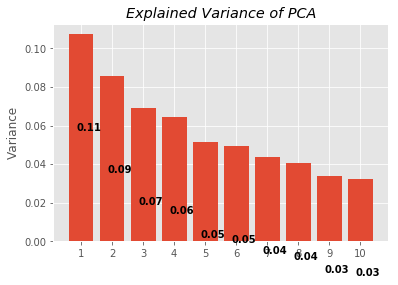

In [303]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
x=[i for i in range(1,n_components+1)]
values = pca.explained_variance_ratio_
plt.bar(x,values)
ax.set_xticks(x)
ax.set_ylabel("Variance")
ax.set_title("Explained Variance of PCA",fontstyle="italic")
for i, v in enumerate(values):
    ax.text( i+0.85, v - 0.05, np.round(v,2), color='black', fontweight='bold')


<IPython.core.display.Javascript object>


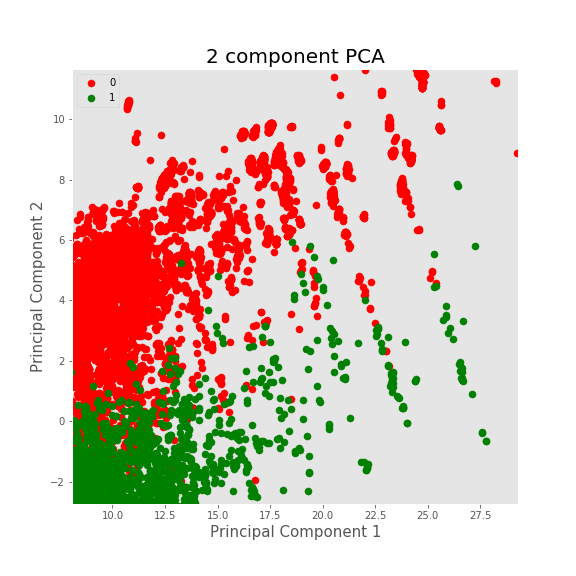

In [324]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['clk'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 0]
               , principalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


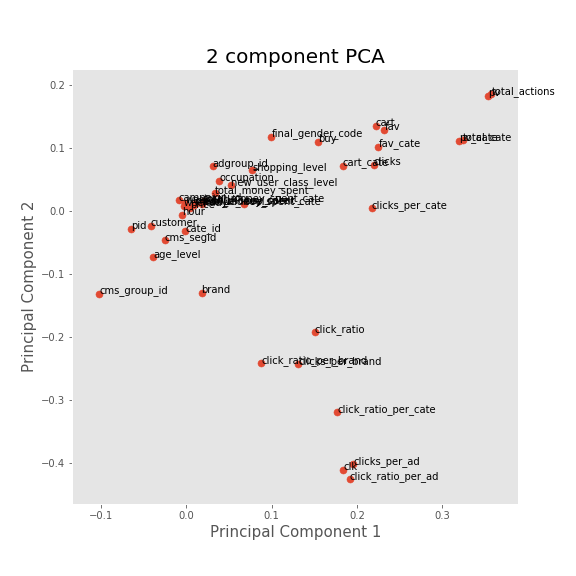

In [325]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
x=pca.components_[0]
y=pca.components_[1]
ax.scatter(x, y, s = 50)

n = train_input.columns#labels
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

ax.grid()
plt.show()


# Simple prediction

## Prepare test set

In [24]:
#merge test
test = test.join(user_profile.set_index("userid"),on="user")
test = test.join(ad_feature.set_index("adgroup_id"),on="adgroup_id")
test = test.join(behavior_groups,on="user")

In [25]:
#add time
test["unix"]=pd.to_datetime(test.time_stamp,unit="s")
test["weekday"]=test.unix.dt.weekday
test["hour"]=test.unix.dt.hour
test["weekend"] = test.weekday >= 5

In [200]:
%%time

#adds number of actions per actiontype and category
import timeit
from datetime import timedelta
from IPython.display import display, clear_output

behavior_groups = behavior_log.groupby(["user","btag","cate"],as_index=False)
counter = 0


#group by user and category, so we look up each combination only once (reduces #lookups to a forth)
user_category_groups = test.groupby(["user","cate_id"]).size().reset_index(name="count")
behavior_by_category = pd.DataFrame()

start_time = 0
for index, row in user_category_groups.iterrows():
    
    total_action_count = 0
    
    for i in ["pv","cart","fav","buy"]:
        key = (row.user,i,row.cate_id)
        if key in behavior_groups.groups.keys():
            count = behavior_groups.get_group(key).shape[0]
            user_category_groups.at[index,i+"_cate"] = count
            total_action_count += count
        else:
            user_category_groups.at[index,i+"_cate"] = 0

    user_category_groups.at[index,"total_cate"] = total_action_count
    
    #print progress
    counter +=1
    clear_output(wait=True)
    start_time = start_time or timeit.default_timer()
    elapsed = timeit.default_timer() - start_time
    total = len(user_category_groups.index)
    percent = counter/total
    runtime = str(timedelta(seconds=elapsed))
    remaining = str(timedelta(seconds=elapsed/percent-elapsed))    
    p = str.format("Done with row {} of {}, {:0.6}%. Runtime: {}, exp. remaining: {} ",
                   counter,total,percent*100,runtime,remaining),
    display(p)
    
#merge into testset
user_category_groups=user_category_groups.drop(["count"],axis=1)
test = pd.merge(test,user_category_groups,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

('Done with row 40106 of 40106, 100.0%. Runtime: 0:14:05.148979, exp. remaining: 0:00:00 ',)

Wall time: 14min 5s


In [226]:
#total_money_spent
total_money_spent = test.groupby(["user"])["price"].sum()
total_money_spent = total_money_spent.to_frame().reset_index().rename(index=str,columns={"price":"total_money_spent"})
test = pd.merge(test,total_money_spent,how="left",left_on=["user"], right_on=["user"])

In [227]:
#total money spent in category
total_money_spent_cate = test.groupby(["user","cate_id"])["price"].sum()
total_money_spent_cate = total_money_spent_cate.to_frame().reset_index().rename(index=str,columns={"price":"total_money_spent_cate"})
test = pd.merge(test,total_money_spent_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [228]:
#average money spent
total_money_spent = test.groupby(["user"])["price"].mean()
total_money_spent = total_money_spent.to_frame().reset_index().rename(index=str,columns={"price":"mean_money_spent"})
test = pd.merge(test,total_money_spent,how="left",left_on=["user"], right_on=["user"])

In [229]:
#average money spent in category
total_money_spent_cate = test.groupby(["user","cate_id"])["price"].mean()
total_money_spent_cate = total_money_spent_cate.to_frame().reset_index().rename(index=str,columns={"price":"mean_money_spent_cate"})
test = pd.merge(test,total_money_spent_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

In [195]:
#merge clicks etc into test
test = pd.merge(test,clicks,how="left",left_on=["user"], right_on=["user"])
test = pd.merge(test,click_ratio,how="left",left_on=["user"], right_on=["user"])

test = pd.merge(test,clicks_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])
test = pd.merge(test,click_ratio_per_ad,how="left",left_on=["user","adgroup_id"], right_on=["user","adgroup_id"])

test = pd.merge(test,clicks_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])
test = pd.merge(test,click_ratio_per_cate,how="left",left_on=["user","cate_id"], right_on=["user","cate_id"])

test = pd.merge(test,clicks_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])
test = pd.merge(test,click_ratio_per_brand,how="left",left_on=["user","brand"], right_on=["user","brand"])

In [64]:
test.to_csv("test_extended.csv",index=False)

## Model

In [204]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train.pid)
train.pid = le.transform(train.pid)
test.pid = le.transform(test.pid)

In [230]:
# sample train set so that ratio of 0 and 1 matches test set (21.559% 1s)
trainRatio = train[train.clk==1].shape[0]/(train[train.clk==1].shape[0]+train[train.clk==0].shape[0]) #ratio of ones
testRatio = 0.21559
print(trainRatio)
if trainRatio > testRatio: #relativeley more ones in train set than in test set -> zeros are limiting factor
    zeros = train[train.clk == 0]
    ones = train[train.clk == 1].sample(round(testRatio*zeros.shape[0]/(1-testRatio)))
    print("first")
    print(ones.shape[0])
    print(zeros.shape[0])
else: # ones are limiting factor
    ones = train[train.clk == 1]
    zeros = train[train.clk == 0].sample(round(ones.shape[0]/testRatio-ones.shape[0]))
    print("second")
    print(ones.shape[0])
    print(zeros.shape[0])
train_set = pd.concat([ones,zeros])

0.05154632728930849
second
107166
389916


In [231]:
train_set[train_set.clk==1].shape[0]/(train_set[train_set.clk==1].shape[0]+train_set[train_set.clk==0].shape[0])

0.21559018431566623

In [259]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn import svm
gnb = lgb.LGBMClassifier()
#gnb = svm.SVC()
#gnb = RandomForestClassifier()
drop = ["unix","time_stamp","user"]
train_set = train.drop(drop,axis=1)
test = test.fillna(-1)
test_set = test.drop(drop,axis=1)
train_set = train_set.drop(["clk"],axis=1)
train_set = train_set.fillna(-1)

In [260]:
#find difference in train and test set
set(train_set.columns).symmetric_difference(test_set.columns)

{'id'}

In [261]:
model = gnb.fit(train_set,train.clk)
pred = model.predict(test_set.drop(["id"],axis=1))

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


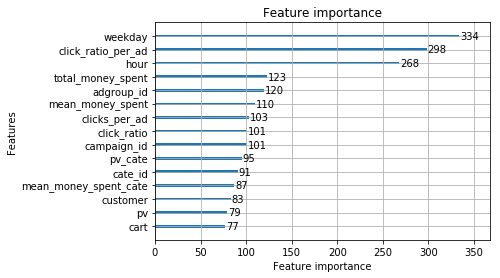

In [262]:
ax = lgb.plot_importance(gnb, max_num_features=15)
plt.show()

In [263]:
submission = pd.DataFrame({"id":test.id,"clk":pred})
submission.to_csv("LightGBM_extended.csv",index=False)

In [264]:
submission.describe()

,clk,id
count,60652.000000,60652.0000
mean,0.048078,30326.5000
std,0.213932,17508.8686
min,0.000000,1.0000
25%,0.000000,15163.7500
50%,0.000000,30326.5000
75%,0.000000,45489.2500
max,1.000000,60652.0000


In [265]:
submission.clk.value_counts()

0    57736
1     2916
Name: clk, dtype: int64

In [202]:
train.to_csv("train_extended.csv",index=False)

In [238]:
test.to_csv("test_extended.csv",index=False)

# Ansätze

PCA -> Clustering?
Apriori Rules?

## Archive